<a href="https://colab.research.google.com/github/Fszta/Digit-recognition/blob/master/train_gpu_google_co.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Fszta/Digit-recognition.git

Cloning into 'Digit-recognition'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 37 (delta 9), reused 5 (delta 0), pack-reused 0
Unpacking objects: 100% (37/37), done.


In [2]:
!cd Digit-recognition/
!pip install -r Digit-recognition/requirements.txt

    100% |████████████████████████████████| 2.8MB 12.4MB/s 
    100% |████████████████████████████████| 13.9MB 3.0MB/s 
    100% |████████████████████████████████| 25.4MB 1.2MB/s 
    100% |████████████████████████████████| 8.9MB 5.7MB/s 
    100% |████████████████████████████████| 2.0MB 13.3MB/s 
    100% |████████████████████████████████| 26.6MB 1.7MB/s 
    100% |████████████████████████████████| 215kB 26.6MB/s 
yellowbrick 0.9 has requirement matplotlib<3.0,>=1.5.1, but you'll have matplotlib 3.0.2 which is incompatible.
thinc 6.12.1 has requirement wrapt<1.11.0,>=1.10.0, but you'll have wrapt 1.11.0 which is incompatible.
pymc3 3.6 has requirement joblib<0.13.0, but you'll have joblib 0.13.1 which is incompatible.
cufflinks 0.14.6 has requirement plotly>=3.0.0, but you'll have plotly 1.12.12 which is incompatible.
  Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6
  Found existing installation: h5py 2.8.0
    Unin

In [3]:
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K


Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  cat_pos = np.ones(swarm_data.size) * center


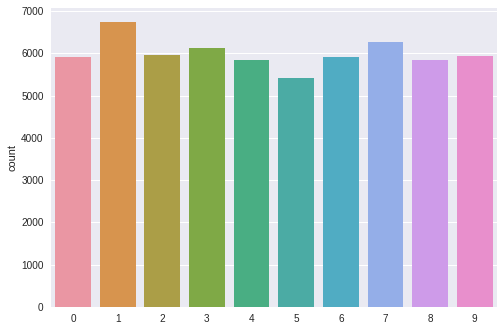

In [4]:
# Set dimension ordering convention 
K.set_image_dim_ordering('th')
seed = 5
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Training set description
sns.set(style="darkgrid")
sns.countplot(y_train)

In [0]:
# Reshape as (channel, width, height)
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

# Inputs normalizations
X_train = X_train / 255
X_test = X_test / 255

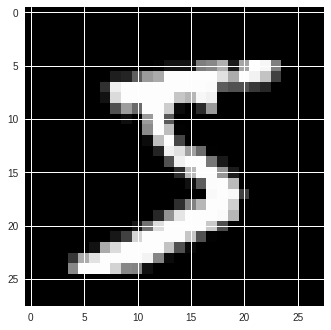

In [6]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

plt.imshow(X_train[0][0,:,:], cmap=plt.get_cmap('gray'))

In [0]:
model = Sequential()

model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=200)

# Evaluate the model 
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

model.save('model.h5')


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.0186 - acc: 0.9934 - val_loss: 0.0354 - val_acc: 0.9902
Epoch 2/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.0166 - acc: 0.9946 - val_loss: 0.0280 - val_acc: 0.9924
Epoch 3/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.0170 - acc: 0.9939 - val_loss: 0.0283 - val_acc: 0.9919
Epoch 4/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.0173 - acc: 0.9942 - val_loss: 0.0240 - val_acc: 0.9927
Epoch 5/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.0147 - acc: 0.9953 - val_loss: 0.0270 - val_acc: 0.9930
Epoch 6/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.0156 - acc: 0.9948 - val_loss: 0.0265 - val_acc: 0.9928
Epoch 7/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.0155 - acc: 0.9944 - val_loss: 0.0289 - 